<h2>Data Cleaning & Preprocessing</h2>

<b>Importing of essential library for data manipulation</b>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

<b>Importing of Dataset</b>

In [21]:
dataset = pd.read_csv('Data/ASEC_individual.csv')
dataset

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,...,I_DISVL1,I_DISVL2,I_SURVL1,I_SURVL2,MIG_CBST,MIG_DSCP,DEP_STAT,FILEDATE,FILESTAT,YYYYMM
0,8238946011902051101101,1,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,81921,1,202103
1,8238946011902051101102,1,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,81921,1,202103
2,8238946011902051101103,1,3,3,1,1,0,0,0,50,...,0,0,0,0,0,0,0,81921,5,202103
3,6092052593105071201101,2,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,81921,3,202103
4,6092052593105071201102,2,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,81921,3,202103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,0105117401643341311101,90757,1,1,1,1,0,0,0,41,...,0,0,0,0,0,0,0,81921,5,202103
163539,1107604140345131311101,90758,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,81921,3,202103
163540,1107604140345131311102,90758,2,2,1,1,0,0,0,42,...,0,0,0,0,0,0,0,81921,3,202103
163541,9516061708016151311101,90759,1,1,1,1,0,0,0,40,...,0,0,0,0,0,0,0,81921,1,202103


<b>Checking Dataset Dimensions</b>

In [3]:
dataset.shape

(163543, 830)

There are currently 830 columns and 163543 rows.
By reviewing the data dictionary, we understand that the data is split into 10 broad topics:
1. Record Identifiers
2. Weights
3. Demographics
4. Basic CPS Items
5. Work Experience
6. Income
7. Poverty
8. Health Insurance
9. Supplemental Poverty Measure
10. Migration
<br>

<b>Assumption</b>
<br>Given that we want to find out how one's background affect their salary, we will not be interested in the record identifiers, weight and other social issues and trends like poverty, health insurance, supplemental poverty measure and migration. We will only be interested in topics: Demographics, Basic CPS Items, Work Experience and Income.

<br>
From <b>individual characteristics</b>, we can find out:
<br>1. Highest education attainment (A_HGA)
<br>2. Marital status (A_MARITL)
<br>3. Gender (A_SEX)
<br>4. Age (AGE1)
<br>5. Race (PRDTRACE)
<br>6. Veteran status (PEAFEVER)
<br>7. Possession of professional certificates (PECERT1)
<br>8. Possession of government certificates (PECERT2)
<br>9. Whether the certification is needed for their job (PECERT3)
<br>10. Disability Status (PRDISFLG)
<br>11. Citizenship group (PRCITSHP)
<br>12. Last Week's Working Hours (A_HRS1)
<br>13. Whether respondent worked less than 35 hours for at least one week (PTYN)
<br>14. Usually work more than 35 hours weekly (A_USLFT)
<br>15. Detailed Household Status (HHDREL)

We can then create a list containing the relevant columns names for demographics

In [4]:
demographics = ['A_HGA', 'A_MARITL', 'A_SEX', 'A_AGE', 'PRDTRACE', 'PEAFEVER', 'PECERT1', 'PECERT2', 'PECERT3', 'PRDISFLG', 'PRCITSHP', 'A_HRS1', 'PTYN', 'HHDREL', 'A_USLFT']

#new column names for relabelling
demographics_new = ['Education', 'Marital', 'Sex', 'Age', 'Race', 'Veteran', 'Pro_Cert', 'Gov_Cert', 'Cert_Need', 'Disability', 'Citizenship', 'Last Week Working Hrs', 'Less than 35hrs for at least 1 week', 'Detailed Household Status', 'More than 35hrs weekly']


For <b>Basic CPS Items</b>, we can find out:
1. Usual Weekly Working Hours (A_USLHRS)
2. Industry (A_MJIND)
3. Occupation Group (A_MJOCC)
4. Occupation (PEIOOCC)
5. Work Class; private, government, self-employed etc (A_CLSWKR)

For <b>Working Experience</b>, we can find out:
1. Longest Industry respondent was in (WEIND)
2. Longest Work Class respondent was in (WECLW)

For <b>Income</b>, we can find out:
1. Total wage and salary earnings (WSAL_VAL) -> Salary

We can then create a list containing the relevant columns names for Basic CPS, Work Experience and Income

In [5]:
basic_cps = ['A_USLHRS', 'A_MJIND', 'A_MJOCC', 'PEIOOCC', 'A_CLSWKR']
experience = ['WEIND', 'WECLW']
income = ['WSAL_VAL']

#new column names for basic_cps, experience and income
basic_cps_new = ['HrsWeek', 'Industry', 'Occupation Group', 'Occupation', 'WorkClass']
experience_new = ['Longest Industry', 'Longest Job Class']
income_new = ['Salary']

<b>Therefore, the features we will be selecting are:</b>
<br>1. Highest education attainment (A_HGA)
<br>2. Marital status (A_MARITL)
<br>3. Gender (A_SEX)
<br>4. Age (AGE1)
<br>5. Race (PRDTRACE)
<br>6. Veteran status (PEAFEVER)
<br>7. Possession of professional certificates (PECERT1)
<br>8. Possession of government certificates (PECERT2)
<br>9. Whether the certification is needed for their job (PECERT3)
<br>10. Disability Status (PRDISFLG)
<br>11. Citizenship group (PRCITSHP)
<br>12. Last Week's Working Hours (A_HRS1)
<br>13. Whether respondent worked less than 35 hours for at least one week (PTYN)
<br>14. Usually work more than 35 hours weekly (A_USLFT)
<br>15. Detailed Household Status (HHDREL)
<br>16. Usual Weekly Working Hours (A_USLHRS)
<br>17. Industry (A_MJIND)
<br>18. Occupation Group (A_MJOCC)
<br>19. Occupation (PEIOOCC)
<br>20. Work Class; private, government, self-employed etc (A_CLSWKR)
<br>21. Longest Industry respondent was in (WEIND)
<br>22. Longest Work Class respondent was in (WECLW)
<br>23. Total wage and salary earnings (WSAL_VAL) (RESPONSE VARIABLE)

<b>Relabelling and Filtering Dataset</b>

In [6]:
#create new dataset
new_data = pd.DataFrame()
new_cols = [demographics_new, basic_cps_new, income_new, experience_new]

n = 0
for lst in [demographics, basic_cps, income, experience]:
    new_lst = new_cols[n]
    n += 1
    for i in range(len(lst)):
        new_data[new_lst[i]] = dataset[lst[i]]
new_data

,Education,Marital,Sex,Age,Race,Veteran,Pro_Cert,Gov_Cert,Cert_Need,Disability,...,Detailed Household Status,More than 35hrs weekly,HrsWeek,Industry,Occupation Group,Occupation,WorkClass,Salary,Longest Industry,Longest Job Class
0,39,1,2,56,1,2,2,-1,-1,1,...,1,0,-1,0,0,-1,0,0,23,9
1,39,1,1,57,1,2,2,-1,-1,2,...,2,0,-1,3,7,6305,1,10000,3,5
2,39,4,2,78,1,2,2,-1,-1,1,...,6,0,-1,0,0,-1,0,0,23,9
3,43,1,2,65,1,2,2,-1,-1,1,...,1,1,40,10,2,2002,1,43000,15,5
4,39,1,1,66,1,2,1,1,1,2,...,2,0,40,6,10,9130,1,33000,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163538,39,7,1,69,4,2,1,1,-1,1,...,1,0,-1,0,0,-1,0,0,14,7
163539,39,1,1,70,4,2,2,-1,-1,2,...,1,0,-1,0,0,-1,0,0,3,7
163540,39,1,2,66,4,2,2,-1,-1,2,...,2,0,40,11,3,4230,1,35000,18,5
163541,40,1,1,55,1,2,2,-1,-1,2,...,1,0,-1,0,0,-1,0,0,23,9


Reduce the dataset size by only including those who are working (ie salary > 0) and receiving pay (WorkClass != 7 & WorkClass != 8)

In [7]:
new_data = new_data[(new_data['Salary'] > 0) & (new_data['WorkClass']!=7) & (new_data['WorkClass']!=8)]

The data dictionary also indicated that the HrsWeek will be 0 if the respondent is in the Armed Forces. We do not want to include Air Force as its detailed salary and allowance are available on the internet. Hence, we will remove those rows.

In [8]:
new_data = new_data[new_data['HrsWeek']>0]

Checking new dataset dimensions

In [9]:
new_data.shape

(63994, 23)

Our new dataset now has 23 columns and 63994 rows.

<b>Checking for missing and null entries</b>

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63994 entries, 3 to 163542
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Education                            63994 non-null  int64
 1   Marital                              63994 non-null  int64
 2   Sex                                  63994 non-null  int64
 3   Age                                  63994 non-null  int64
 4   Race                                 63994 non-null  int64
 5   Veteran                              63994 non-null  int64
 6   Pro_Cert                             63994 non-null  int64
 7   Gov_Cert                             63994 non-null  int64
 8   Cert_Need                            63994 non-null  int64
 9   Disability                           63994 non-null  int64
 10  Citizenship                          63994 non-null  int64
 11  Last Week Working Hrs                63994 non-null  

Hence, we found that there are no missing or null entries for every row.

<b>Encoding Response Variable</b>

Our response variable is now a numerical variable. As our problem is a multi-class classfication problem, we want to encode it into a categorical variable.

We want to avoid class inbalance so we will split the classes by quantiles. We will split the data into 4 classes:
<br>Class 4: top 25%
<br>Class 3: 25-50% percentile (inclusive of 25)
<br>Class 2: 50-75% percentile (inclusive of 50)
<br>Class 1: 75-100% percentile (inclusive of 75)

In [11]:
#understanding the value at each class
print('Class 4 lowest salary:', new_data['Salary'].quantile(q=0.75))
print('Class 3 lowest salary:', new_data['Salary'].quantile(q=0.50))
print('Class 2 lowest salary:', new_data['Salary'].quantile(q=0.25))
print('Class 1 lowest salary:', new_data['Salary'].quantile(q=0))

Class 4 lowest salary: 75000.0
Class 3 lowest salary: 46000.0
Class 2 lowest salary: 25100.0
Class 1 lowest salary: 5.0


In [12]:
#encoding salary values into different classes
for index in range(len(new_data['Salary'])):
    temp = new_data['Salary'].iloc[index]
    if temp > 75000: #class 4
        new_data['Salary'].iloc[index] = 4
    elif temp > 46000: #class 3
        new_data['Salary'].iloc[index] = 3
    elif temp > 25100: #class 2
        new_data['Salary'].iloc[index] = 2
    else: #class 1
        new_data['Salary'].iloc[index] = 1

<b>Checking for target classes imbalance</b>

Count for each income class
3    16375
2    16091
1    16002
4    15526
Name: Salary, dtype: int64


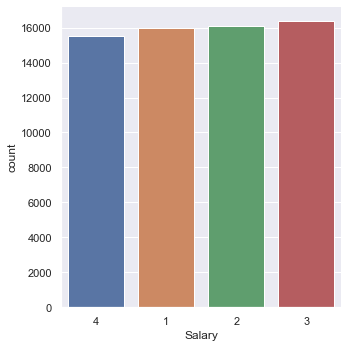

In [13]:
print('Count for each income class')
print(new_data['Salary'].value_counts(ascending=False))
sb.catplot(x='Salary', data=new_data, kind='count', height = 5, order=new_data['Salary'].value_counts(ascending=True).index)

We see that the various income classes are quite balanced.

<b>Exporting this reduced CSV file for future reference</b>

In [14]:
new_data.to_csv('Data/reduced_dataset.csv', index=False)

<h2>Splitting data into train and test data</h2>

Importing scikitlearn library

In [15]:
from sklearn.model_selection import train_test_split

We will now split the data into train and test datasets with test being 20% of the overall dataset

In [17]:
predictor_var = []
for var in new_data.columns:
    if var != 'Salary':
        predictor_var.append(var)


y = new_data['Salary']
x = new_data[predictor_var]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

We will now export the train and test data into csv files

In [18]:
x_train.to_csv('Data/x_train.csv', index=False)
x_test.to_csv('Data/x_test.csv', index=False)
y_train.to_csv('Data/y_train.csv', index=False)
y_test.to_csv('Data/y_test.csv', index=False)